In [1]:
# Analysis on Google App's ratings
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset
df=pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
# Shape of dataset
df.shape

(10841, 13)

In [5]:
# Describe data
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

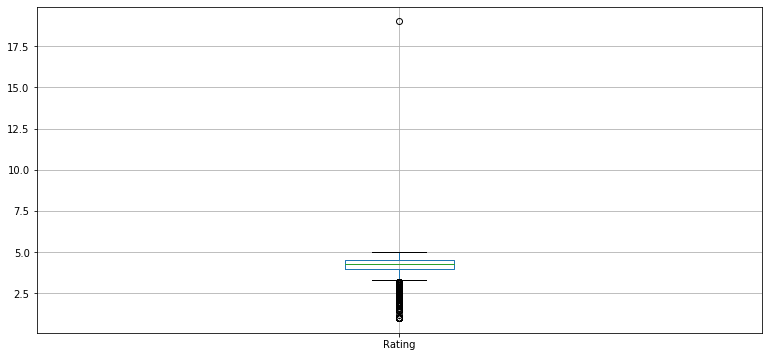

In [13]:
# Plot the above statstical summary using boxplot
df.boxplot(figsize=(13,6))

In [14]:
#Retrieve some info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
# data Cleaning
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
#Check how many rating has more than 5 outlier
df[df['Rating']>5]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [19]:
df.drop([10472],inplace=True)

In [20]:
df[10470:10475] ##to check whether the 10472 row is deleted or not!

App         Category  Rating Reviews  Size  \
10470               Jazz Wi-Fi    COMMUNICATION     3.4      49  4.0M   
10471         Xposed Wi-Fi-Pwd  PERSONALIZATION     3.5    1042  404k   
10473  osmino Wi-Fi: free WiFi            TOOLS     4.2  134203  4.1M   
10474             Sat-Fi Voice    COMMUNICATION     3.4      37   14M   
10475         Wi-Fi Visualizer            TOOLS     3.9     132  2.6M   

          Installs  Type Price Content Rating           Genres  \
10470      10,000+  Free     0       Everyone    Communication   
10471     100,000+  Free     0       Everyone  Personalization   
10473  10,000,000+  Free     0       Everyone            Tools   
10474       1,000+  Free     0       Everyone    Communication   
10475      50,000+  Free     0       Everyone            Tools   

            Last Updated Current Ver   Android Ver  
10470  February 10, 2017         0.1    2.3 and up  
10471     August 5, 2014       3.0.0  4.0.3 and up  
10473     August 7, 2018     6.06.14    4.4 and up  
10474  November 21, 2014     2.2.1.5    2.2 and up  
10475       May 17, 2017       0.0.9    2.3 and up

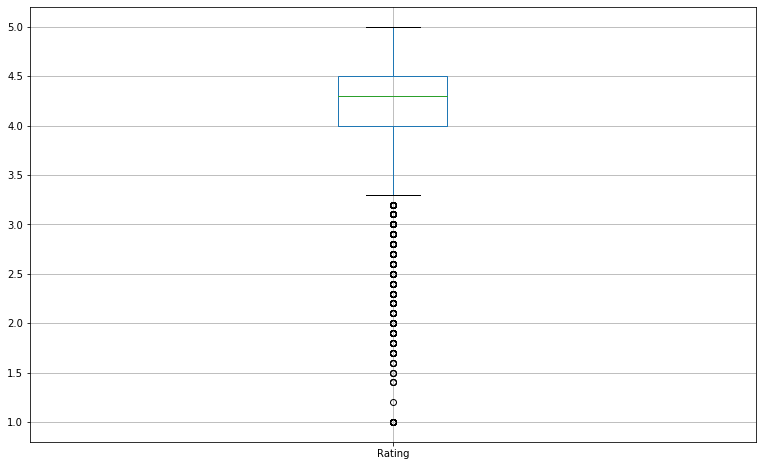

In [23]:
## Again draw boxplot and see the difference
df.boxplot(figsize=(13,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A28F967C48>]],
      dtype=object)

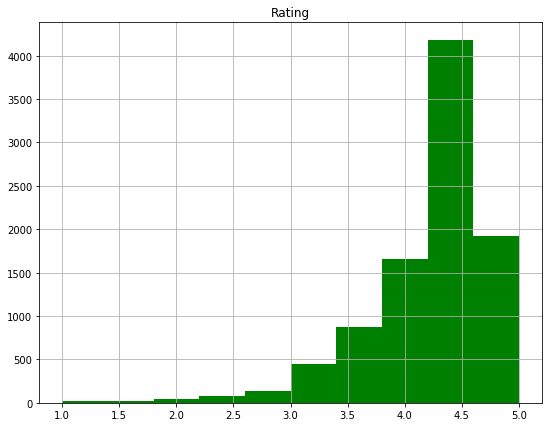

In [24]:
df.hist(color='green',figsize=(9,7))

In [25]:
# Removing column which consists of null values
threshold=len(df)*0.1
threshold

1084.0

In [26]:
df.dropna(thresh=threshold, axis=1, inplace=True)

In [27]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [28]:
# Fill null values with mean, median or mode
def inpute_median(series):
    return series.fillna(series.median())

In [29]:
df.Rating=df['Rating'].transform(inpute_median)

In [30]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [31]:
print(df['Type'].mode())
df['Android Ver'].mode()

0    Free
dtype: object


0    4.1 and up
dtype: object

In [32]:
print(df['Type'].mode())
df['Current Ver'].mode()

0    Free
dtype: object


0    Varies with device
dtype: object

In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [34]:
# FIll the missing value with mode
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [35]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [36]:
# Convert Price ,install and rating into numerical values
df['Price']=df['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x))

df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')                                                       
df['Price']=df['Price'].apply(lambda x:float(x))

In [37]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: float(x))

In [38]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size    Installs  Type  Price Content Rating  \
0      159   19M     10000.0  Free    0.0       Everyone   
1      967   14M    500000.0  Free    0.0       Everyone   
2    87510  8.7M   5000000.0  Free    0.0       Everyone   
3   215644   25M  50000000.0  Free    0.0           Teen   
4      967  2.8M    100000.0  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [40]:
# Check datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null float64
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [41]:
df.describe()

Rating       Reviews      Installs         Price
count  10840.000000  1.084000e+04  1.084000e+04  10840.000000
mean       4.206476  4.441529e+05  1.546434e+07      1.027368
std        0.480342  2.927761e+06  8.502936e+07     15.949703
min        1.000000  0.000000e+00  0.000000e+00      0.000000
25%        4.100000  3.800000e+01  1.000000e+03      0.000000
50%        4.300000  2.094000e+03  1.000000e+05      0.000000
75%        4.500000  5.477550e+04  5.000000e+06      0.000000
max        5.000000  7.815831e+07  1.000000e+09    400.000000

In [42]:
# Visualising the data
grp=df.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
x
y
z

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [43]:
y

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

In [44]:
z

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

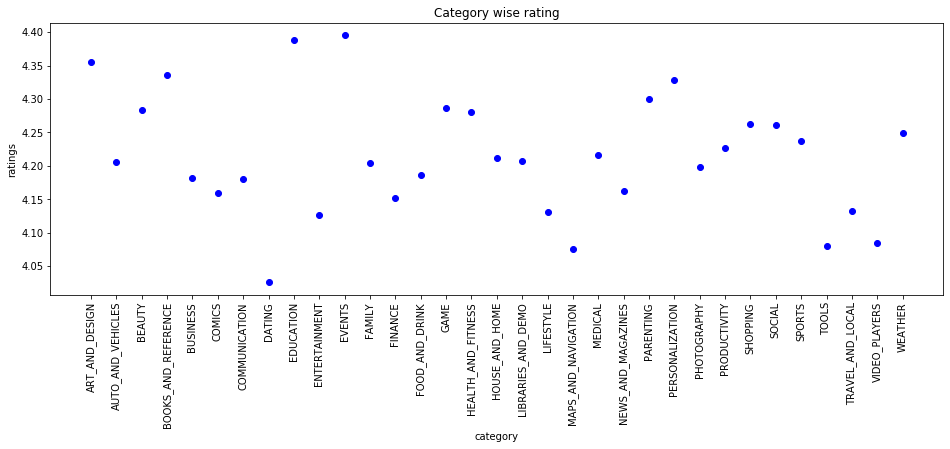

In [45]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='blue')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('category')
plt.ylabel('ratings')
plt.show()

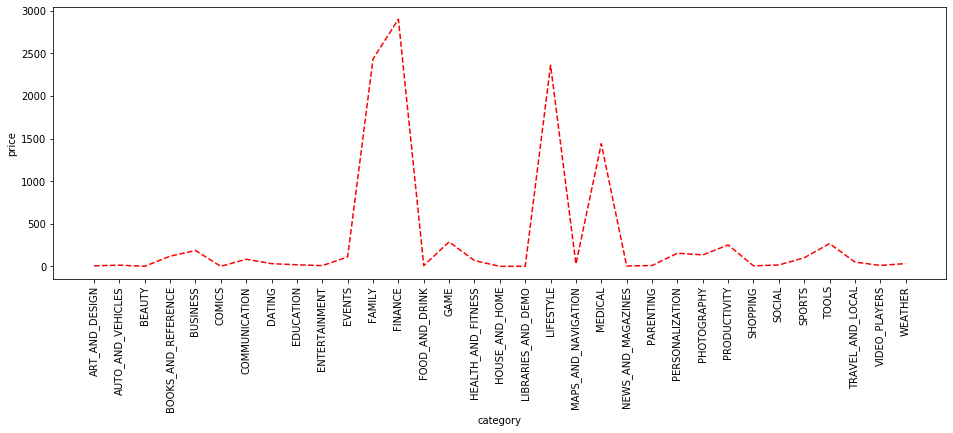

In [46]:
# Graph basis on Price
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('price')
plt.show()

after analysing the above graph we can see that category of 'finance' 'lifestyle' 'medical' apps people are buying most.

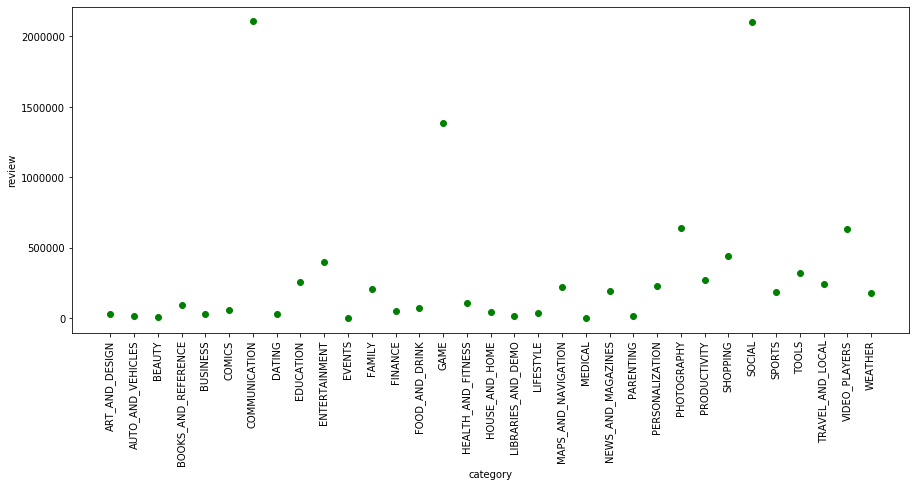

In [47]:
# insights of review
plt.figure(figsize=(15,6))
plt.plot(z,'ro',color='green')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('review')
plt.show()

After analysing review graph we can see that category of 'communication' 'game' and 'social' apps are reviewed by most of the people.